<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Преобразование-столбцов-и-типов" data-toc-modified-id="Преобразование-столбцов-и-типов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Преобразование столбцов и типов</a></span></li><li><span><a href="#Расчет-суммарных-продаж" data-toc-modified-id="Расчет-суммарных-продаж-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Расчет суммарных продаж</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Обработка пропусков</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-выпуска-игр" data-toc-modified-id="Анализ-выпуска-игр-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Анализ выпуска игр</a></span></li><li><span><a href="#Анализ-платформ" data-toc-modified-id="Анализ-платформ-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Анализ платформ</a></span></li><li><span><a href="#Анализ-оценок" data-toc-modified-id="Анализ-оценок-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Анализ оценок</a></span></li><li><span><a href="#Анализ-жанров" data-toc-modified-id="Анализ-жанров-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Анализ жанров</a></span></li></ul></li><li><span><a href="#Составление-портрета-пользователя-каждого-региона" data-toc-modified-id="Составление-портрета-пользователя-каждого-региона-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Составление портрета пользователя каждого региона</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Итоговые-выводы" data-toc-modified-id="Итоговые-выводы-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Итоговые выводы</a></span></li></ul></div>

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

# Исследование видеоигр

## Описание проекта

**Заказчик** — интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


**Входные данные** — собранные из открытых источников исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Вам нужно выявить определяющие успешность игры закономерности. Данные покрывают временной период с 1980 по 2016 года включительно. 

Ход исследования

Данное исследование будет состоять из 7 основных этапов, а именно:
1. Описание проекта
2. Описание данных
3. Подготовка данных
    * Преобразование столбцов и типов
    * Расчет суммарных продаж
    * Обработка пропусков
4. Исследовательский анализ данных
    * Анализ выпуска игр
    * Анализ платформ
    * Анализ оценок
    * Анализ жанров
5. Составление портрета пользователя каждого региона
6. Проверка гипотез
7. Итоговые выводы

Исходный датафрейм состоит из 11 столбцов, отвечающих за следующие характеристики:
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Описание данных

Начнем с загрузки исходных данных и выведения основной информации о них с целью предварительного анализа. 

In [3]:
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Итак, как уже упоминалось ранее, в исходном датафрейме 11 столбцов, которые отвечают за разные характеристики видеоигр. По типу данные распределены примерно равномерно: 6 переменных имеют тип `floar64` и 5 с типом `object`. 5 нечисловых типов среди переменных довольно много, особенно учитывая специфику данных, так что некоторые характеристики будет необходимо преобразовать. Так, для **оценки пользователей**  больше подойдет тип данных `float`, ведь оценки для игр ставятся числами. Также хотелось бы преобразовать **оценки критиков** и **года выпуска игры** в тип `int`, ведь обе характеристики в действительности принимают только целые числа, однако в рамках данного кейса это остается невозможным - в обеих переменных наблюдаются пропущенные значения. 

Что еще можно заметить в полученной информации? Полученная выборка не полная, в ней присутствуют пропуски у некоторых наблюдений. Значит, на этапе предобработки нам также будет необходимо решить, как поступить с пропущенными значениями - оставить все как есть или чем-то заполнить.

Наконец, для удобства дальнейшей работы стоит поработать над именами переменных, а именно привести их к нижнему регистру. 

## Подготовка данных

### Преобразование столбцов и типов

Приступим к первому этапу работы над данным кейсом - предобработке исходных данных. 

Начнем с замены исходных названий столбцов. На практике принято прописывать переменные в нижнем регистре - именно к такому мы и приведем исходные названия. Исключениями будут три столбца, отвечающие за регион продажи игр - поскольку в их названии используются общепринятые аббревиатуры, оставим их в верхнем регистре. 

In [6]:
data.columns = ['name', 'platform', 'year_of_release', 'genre', 'NA_sales', 'EU_sales', 'JP_sales', 'other_sales',
                'critic_score', 'user_score', 'rating']

Для удобства при дальнейшей работе создадим словарь для переменной, отвечающей за **рейтинг** игры - с ростом рейтинга будет увеличиваться номер категории. Это несколько упростит этап, посвященный исследовательскому анализу данных. Отдельно отметим, что категория "Е" первоначально учитывалась как "К-А". Для удобства анализа объединим их. 

In [7]:
def rating_category(row):
    rating = row['rating']
    if rating == 'RP':
        return 0
    elif rating == 'EC':
        return 1
    elif rating == 'E':
        return 2
    elif rating == 'E10+':
        return 3
    elif rating == 'T':
        return 4
    elif rating == 'K-A':
        return 2
    elif rating == 'M':
        return 5
    elif rating == 'AO':
        return 6
    else: return np.nan
    
    
data['rating_cat'] = data.apply(rating_category, axis=1)

In [8]:
rating_dict = data[['rating', 'rating_cat']]
rating_dict = rating_dict.drop_duplicates().reset_index(drop = True)
data.drop(columns = ['rating'], axis = 1, inplace=True)
rating_dict.sort_values('rating_cat')

,rating,rating_cat
8,RP,0.0
7,EC,1.0
0,E,2.0
5,K-A,2.0
4,E10+,3.0
3,T,4.0
2,M,5.0
6,AO,6.0
1,NaN,NaN


Теперь перейдем к преобразованию типов данных. Как уже упоминалось ранее, мы преобразуем тип данных только у **оценок пользователей** в тип `float`.

На данную характеристику необходимо обратить особое внимание, ведь она принимает не только численные значения, но и особое значение `tbd`. Чтобы не повторять смену типов данных на более поздних этапах, для начала обработаем данное уникальное значение.

Что обозначает `tbd`? Чтобы гарантировать точное отображение оценок, данных критиками или пользователями, многие ресурсы не отображают суммарную оценку одной из категорий до тех пор, пока они не будут иметь некоторое обязательное минимальное число оценок. После достижения минимального порога, оценка появляется. 

Получается, по некоторым играм было опубликовано недостаточное количество оценок от пользователей для расчета средней пользовательской оценки и поэтому у таких игр возникало уникальное значение `tbd`. Оставить данное значение как есть мы не можем - это значительно усложнит дальнейший анализ. В таком случае заменим `tbd` на уникальное значение оценки -1. 

In [9]:
data.loc[data['user_score'] == "tbd", 'user_score'] = -1

Теперь мы можем спокойно преобразовать тип у данной переменной.

In [10]:
data['user_score'] = data['user_score'].astype('float', errors = 'ignore')

### Расчет суммарных продаж

Теперь займемся расчетом дополнительной характеристики - суммарному объему продаж. Поскольку у характеристик, участвующих в подсчете, отсутствуют наблюдения с пропусками, мы можем провести расчет на любом этапе предобработки. Проведение расчетов именно сейчас обусловлено тем, что это сможет помочь при работе над пропущенными значениями далее.

In [11]:
data['sum_sales'] = data['NA_sales'] + data['JP_sales'] + data['EU_sales'] + data['other_sales']

### Обработка пропусков

Перейдем к работе с пропущенными переменными. Начнем с вывода общей информации о пропусках.

In [12]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating_cat         6766
sum_sales             0
dtype: int64

In [13]:
for name in ['name', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating_cat']:
    print(f'Доля пропусков в столбце {name}:', '%.3f' % data[name].isna().mean())

Доля пропусков в столбце name: 0.000
Доля пропусков в столбце year_of_release: 0.016
Доля пропусков в столбце genre: 0.000
Доля пропусков в столбце critic_score: 0.513
Доля пропусков в столбце user_score: 0.401
Доля пропусков в столбце rating_cat: 0.405


Рассмотрим все переменные, в которых присутствуют пропуски. 

Начнем с переменных, отвечающих за **имя** и **жанр** игры, поскольку в этих характеристиках наименьшее число пропущенных значений. Выведем эти наблюдения и посмотрим общую информацию по таким играм - возможно, благодаря дополнительной информации мы сможем найти, что это были за игры, и самостоятельно заполнить пропуски.

In [14]:
data[data['name'].isna() == True]

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating_cat,sum_sales
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


По стечению обстоятельств, нет названия и жанра у одних и тех же игр. В целом, по двум этим играм мало информации, так что восстановить ее вручную не представляется возможным. В таком случае мы можем удалить эти наблюдения и на это есть две причины. Во-первых, доля наблюдений с пропусками в характеристиках **имени** и **жанра** от общей выборки крайне мала. Во-вторых, что более важно, мы проводим текущий анализ для того, чтобы компания "Стримчик" выявила потенциально популярный продукт и спланировала рекламные компании. Если одна из игр с пропусками вдруг окажется потенциальным продуктом, компания не сможет рекламировать ее, не зная ее названия. В таком случае от этих двух наблюдений действительно стоит избавиться.

In [15]:
data = data.dropna(subset=['genre', 'name'])

Перейдем к анализу переменной, отвечающей за **год релиза** видеоигры. Доля наблюдений с пропусками для данной характеристики также не велика - она составляет чуть больше полутора процентов. К сожалению, заполнить эти пропуски собственноручно для нас не представляется возможным, ведь в абсолютном выражении число пропусков все-таки велико, чтобы искать каждую из игр в отдельности. Но и удаление данных наблюдений будет поспешным решением - мы просто потеряем часть данных, которая могла бы оказать значимое влияние на результат. В таком случае допустимо оставить пропуски у данной характеристики незаполненными.

Теперь рассмотрим следующие характеристики - **оценки критиков** и **оценки пользователей**. Доля пропусков у обеих переменных весьма велика, поэтому не стоит оставлять эти значения без обработки. Попробуем восстановить примерную оценку игры от пользователей и критиков в зависимости от суммарных объемов продаж. Мы руководствовались следующей логикой - чем выше были оценки игры, тем больше копий было продано, поскольку видя хорошие оценки, пользователи с большей охотой покупали эти самые игры. Примерна похожая логика используется для оценок критиков - чем выше продаже игры, тем лучше ее, вероятно, оценили критики, имеющие возможность пройти игру и дать оценку до официального релиза.

Отдельно хотелось бы отметить такой момент. Метод, который мы используем для заполнения пропусков, основывается исключительно на ограничении в исходных данных. Так, для выявления более точных оценок как от пользователей, так и от критиков, можно было бы использовать информацию о студиях, которы выпускали каждую из игр, а также информацию о том, является ли игра частью некоторой серии или нет.

In [16]:
data['sum_sales_cat'] = pd.cut(data['sum_sales'], bins=10)
piv = data.pivot_table(index='sum_sales_cat', values=['critic_score', 'user_score'], aggfunc=['mean'])
piv.columns=['critic_score', 'user_score']
piv

,critic_score,user_score
sum_sales_cat,,
"(-0.0825, 8.254]",68.853502,5.146099
"(8.254, 16.508]",87.214286,7.195238
"(16.508, 24.762]",83.000000,7.871429
"(24.762, 33.016]",78.500000,7.875000
"(33.016, 41.27]",82.000000,8.300000
"(74.286, 82.54]",76.000000,8.000000


In [17]:
for score in ['critic_score', 'user_score']:
    data.loc[data["sum_sales"] <= 8.254, score] = data.loc[data['sum_sales'] <= 8.254, score].fillna(piv[score][0])
    data.loc[data['sum_sales'] <= 16.508, score] = data.loc[data['sum_sales'] <= 16.508, score].fillna(piv[score][1])
    data.loc[data['sum_sales'] <= 24.762, score] = data.loc[data['sum_sales'] <= 24.762, score].fillna(piv[score][2])
    data.loc[data['sum_sales'] <= 33.016, score] = data.loc[data['sum_sales'] <= 33.016, score].fillna(piv[score][3])
    data.loc[data['sum_sales'] <= 41.27, score] = data.loc[data['sum_sales'] <= 41.27, score].fillna(piv[score][4])
    data.loc[data['sum_sales'] <= 82.54, score] = data.loc[data['sum_sales'] <= 82.54, score].fillna(piv[score][5])

Наконец, перейдем к последней из переменных с пропущенными значениями - **рейтинг от организации ESRB**. Доля пропусков у данной переменной также довольно велика. Между тем, мы оставим эту характеристику без изменения. Для объяснения причин, почему мы решили проигнорировать пропуски у данной характеристики, немного углубимся в предмет выставления рейтинга. 

Рейтинг для каждой видеоигры в рамках системы ESRB выставляется следующим образом. Компания, выпустившая игру, отсылает в компанию видеоролик с наиболее впечатляющими и резкими сценами игры, а также заполненную анкету. Именно на основе этих материалов и выставляется рейтинг. Другими словами, рейтинг является слишком субъективной оценкой, формирующейся индивидуально для каждой игры в зависимости от содержания и ее сюжета. Из предоставленных в исходных данных характеристик, к сожалению, ни одна в достаточной мере не описывает ни содержание, ни сюжет самих игр. Кроме того, использовать средний или медианный рейтинг также не совсем правильно - даже максимально похожие по своим характеристикам игры могут обладать существенно различным рейтингом, опять-таки, из-за своего содержания.

Однако, незаполнение пропусков приведет к потере существенного объема данных. В таком случае, чтобы не исказить данные, а также не потерять их, воспользуемся значением заглушкой - "-1"

In [18]:
data['rating_cat'] = data['rating_cat'].fillna(-1)

Проверим, что устранение пропусков прошло успешно. Напомним, что нами было принято решение оставить пропуски в переменной, отвечающих за **год выпуска игры**.

In [19]:
data.isna().sum()

name                 0
platform             0
year_of_release    269
genre                0
NA_sales             0
EU_sales             0
JP_sales             0
other_sales          0
critic_score         0
user_score           0
rating_cat           0
sum_sales            0
sum_sales_cat        0
dtype: int64

Как можно заметить, пропуски действительно остались только в тех переменных, которые мы не стали обрабатывать.

Основная часть работы по предобработке данных выполнена. Для того чтобы проверить, что все наши преобразования были проведены успешно, вновь выведем основную информацию о данных.

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16713 non-null  object  
 2   year_of_release  16444 non-null  float64 
 3   genre            16713 non-null  object  
 4   NA_sales         16713 non-null  float64 
 5   EU_sales         16713 non-null  float64 
 6   JP_sales         16713 non-null  float64 
 7   other_sales      16713 non-null  float64 
 8   critic_score     16713 non-null  float64 
 9   user_score       16713 non-null  float64 
 10  rating_cat       16713 non-null  float64 
 11  sum_sales        16713 non-null  float64 
 12  sum_sales_cat    16713 non-null  category
dtypes: category(1), float64(9), object(3)
memory usage: 1.7+ MB


In [21]:
data.head()

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating_cat,sum_sales,sum_sales_cat
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.000,2.0,82.54,"(74.286, 82.54]"
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,82.0,8.300,-1.0,40.24,"(33.016, 41.27]"
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.300,2.0,35.52,"(33.016, 41.27]"
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.000,2.0,32.77,"(24.762, 33.016]"
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,78.5,7.875,-1.0,31.38,"(24.762, 33.016]"


Итак, нами была проведена работа по подготовке данных для дальнейшего анализа.

В рамках данного этапа мы:

    1. Преобразовали названия характеристик, а именно привели их к более удобному в работе формату - нижнему регистру
    
    2. Преобразовали тип данных у некоторых характеристик
Перевели одну из исходных характеристик в численный тип, что в дальнейшем упростит работу с ней

    3. Выявили и обработали пропуски и уникальные значения
Из 11 исходных характеристик 6 имели пропуски. По итогу проделанной работы пропущенные значения остались только в 2 из 13 характеристик. Для каждой характеристики или их группы мы попытались подобрать наиболее оптимальный путь для заполнения пропущенных значений. 

    4. Провели дополнительные расчеты новых характеристик

Также поговорим немного о потенциально возможных причинах возникновения пропущенных значений. По исходному заданию нам сказано, что данные по видеоиграм собирались из открытых источников. В таком случае, наиболее вероятной причиной потери некоторых данных является случайная составляющая или человеческий фактор - например, произошла потеря некоторой части исходных данных при считывании их из источника или при объединении. Также можно предположить, что по некоторым наиболее старым видеоиграм могло не оказаться части данных - т.е. была проблема случайного пропуска в самом исходнике.

## Исследовательский анализ данных

Перейдем к исследовательской части проекта. В рамках данного блока мы проанализируем наиболее значимые характеристики игр - год выпуска, жанр, платформы. Также на данном этапе мы отсечем часть нерелевантных данных - информацию о тех играх, которые были выпущены слишком давно и их особенности не соответствуют текущим реалиям.

### Анализ выпуска игр

Начнем блок анализа с изучения времени выпуска игр из исходного набора данных. Для этого посмотрим, сколько игр выпускалось каждый год в рассматриваемый период. Также, поскольку в первые года игр выпускалось существенно меньше, рассмотрим более детально период, начиная с 2000 года. 

In [22]:
font = {'family': 'serif','weight': 'normal', 'size': 20}

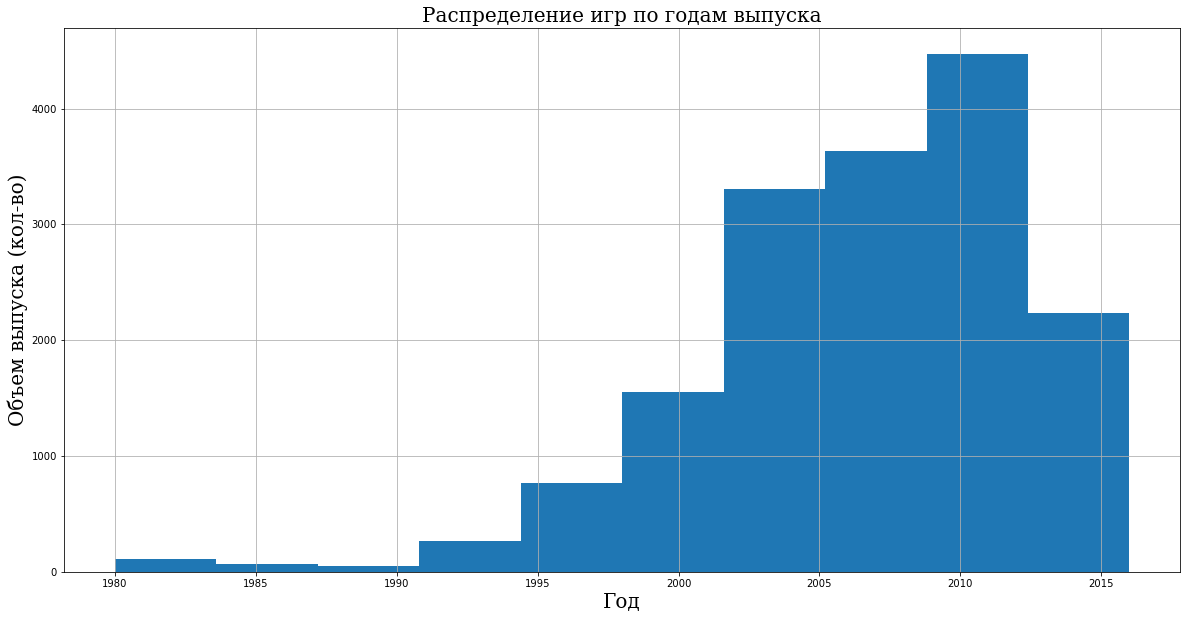

In [23]:
plt.figure(figsize=[20, 10])
plt.hist(data['year_of_release'])
plt.title('Распределение игр по годам выпуска', fontdict=font)
plt.xlabel('Год', fontdict=font)
plt.ylabel('Объем выпуска (кол-во)', fontdict=font)
plt.grid(True)
plt.show()

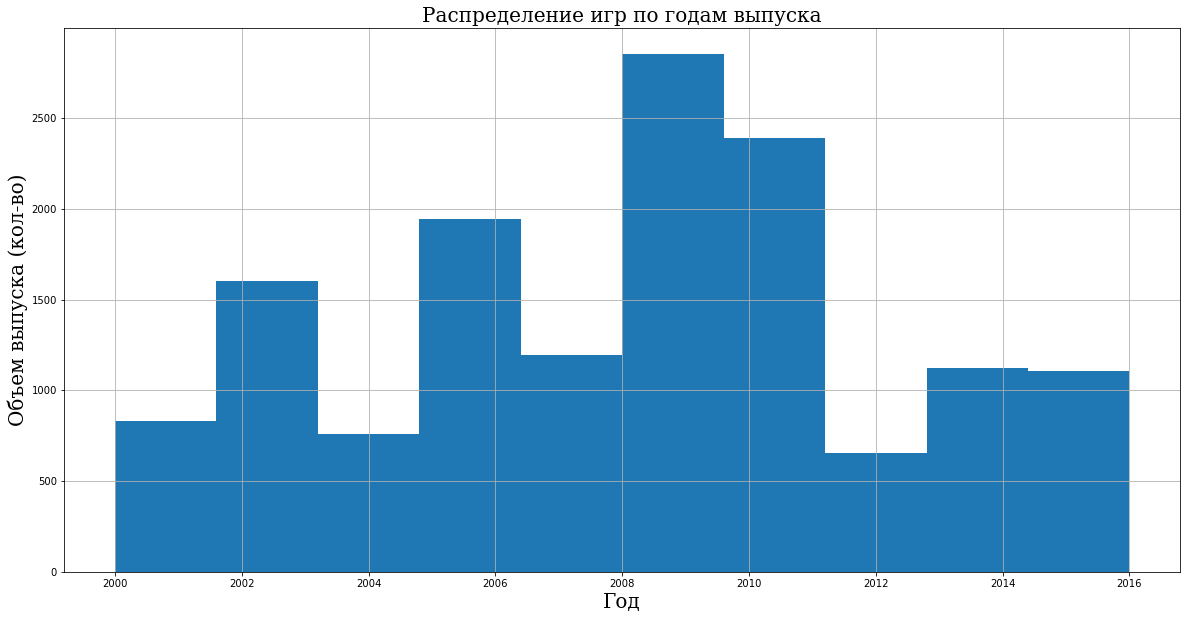

In [24]:
plt.figure(figsize=[20, 10])
plt.hist(data[data['year_of_release'] >= 2000]['year_of_release'])
plt.title('Распределение игр по годам выпуска', fontdict=font)
plt.xlabel('Год', fontdict=font)
plt.ylabel('Объем выпуска (кол-во)', fontdict=font)
plt.grid(True)
plt.show()

Что можно сказать о количестве выпускаемых игр по годам? В первое рассматриваемое десятилетие наблюдается небольшое снижение в объеме выпускаемых игр, после чего начинается стремительный общий рост данного показателя, который при этом чередуется с падением объемов продаж каждый второй год. Пик в объеме выпускаемых игр в год достигается в 2009, после чего он продолжает снижаться вплоть до последнего года в выборке. 

В целом, полученные результаты вполне логичны. В первые рассматриваемые года создание игр было процессом длительным и непростым в силу того уровня развития технологий. Со временем прогресс значительно вырос и вместе с ним выросло число видеоигр - теперь создавать их было куда проще и они стали более доступными для широкой части населения. В определенный момент, который как раз приходится на пик по объему производства, компании, выпускающие игры несколько меняют свой вектор - теперь становится принятым брать не количеством выпускаемых игр, а их качеством. Из-за этого новые игры начинают выходить реже. 

Также хотелось бы отметить тот факт, что исходный период, в рамках которого мы рассматриваем выпускаемые игры, не совсем актуален для текущего времени. Можно выделить три основных периода:
* с 1980 до 2000 - зарождение игровой индустрии
* с 2000 до 2009 - стремительный рост и развитие
* с 2009 до 2016 - новые реалии
Уже на данном этапе, мы можем с уверенностью сказать, что данными за первый период мы можем пренебречь для дальнейшего анализа. Однако, для выбора окончательных границ актуального периода необходимо провести дополнительный анализ.

Теперь рассмотрим распределение игр по годам относительно наиболее популярных платформ. Отберем некоторое количество консолей по суммарным продажам и построим для них распределение по годам.

In [25]:
data.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values('sum_sales', ascending =False).head(10)

,sum_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Остановимся на 6 топовых консолях по суммарному объему продаж - разрыв между 6 и 7 слишком велик. 

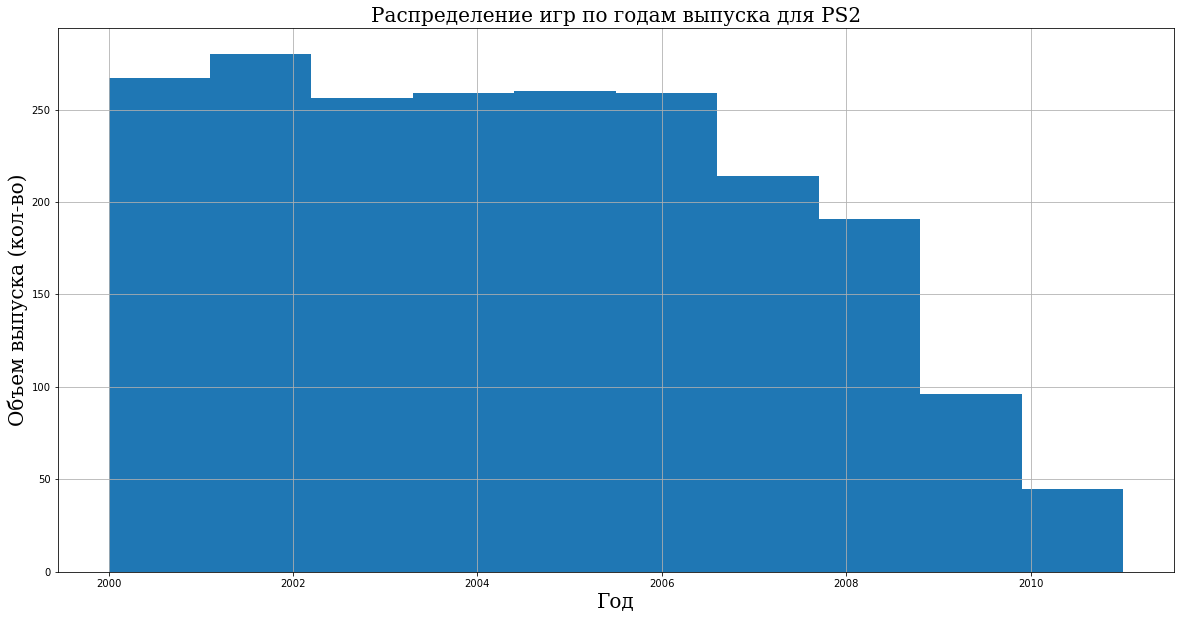

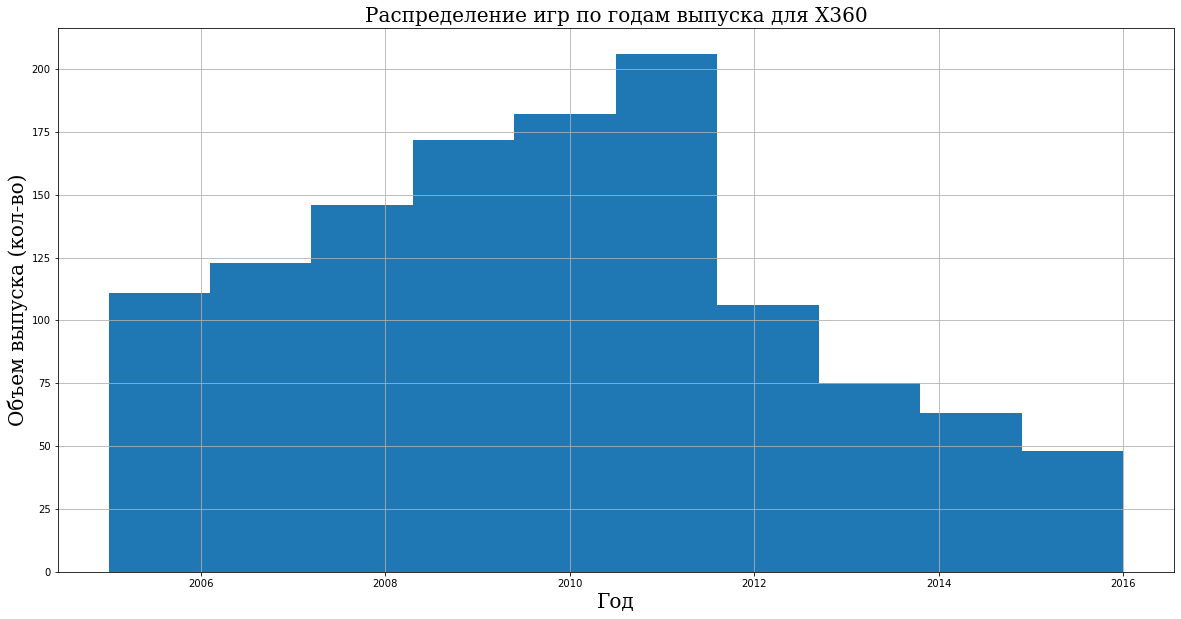

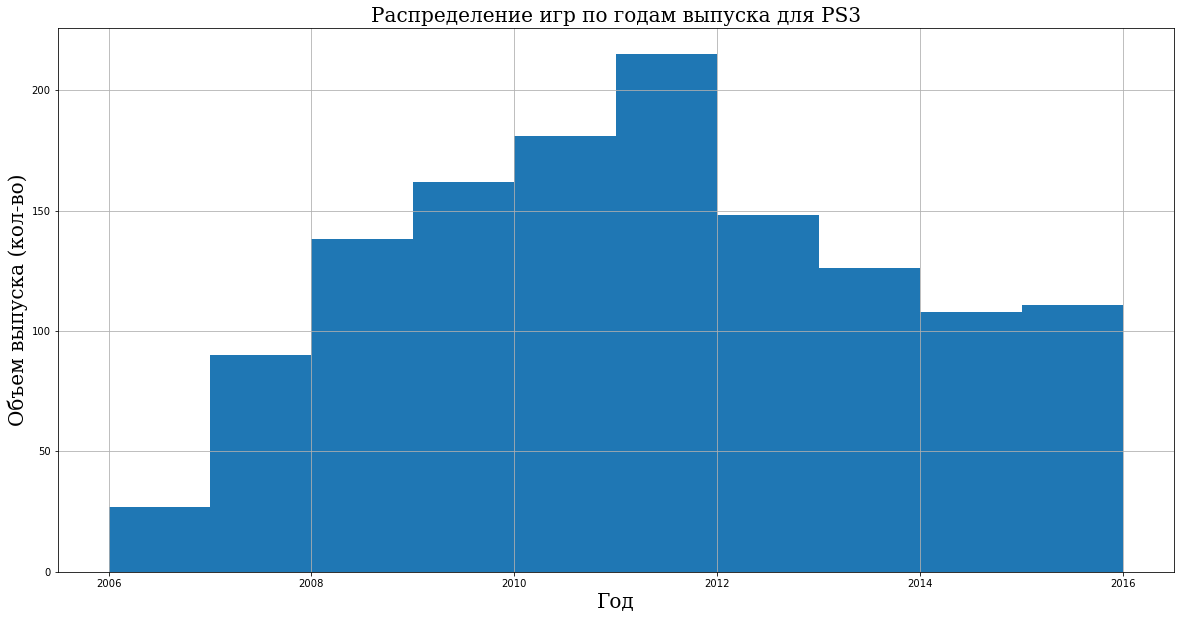

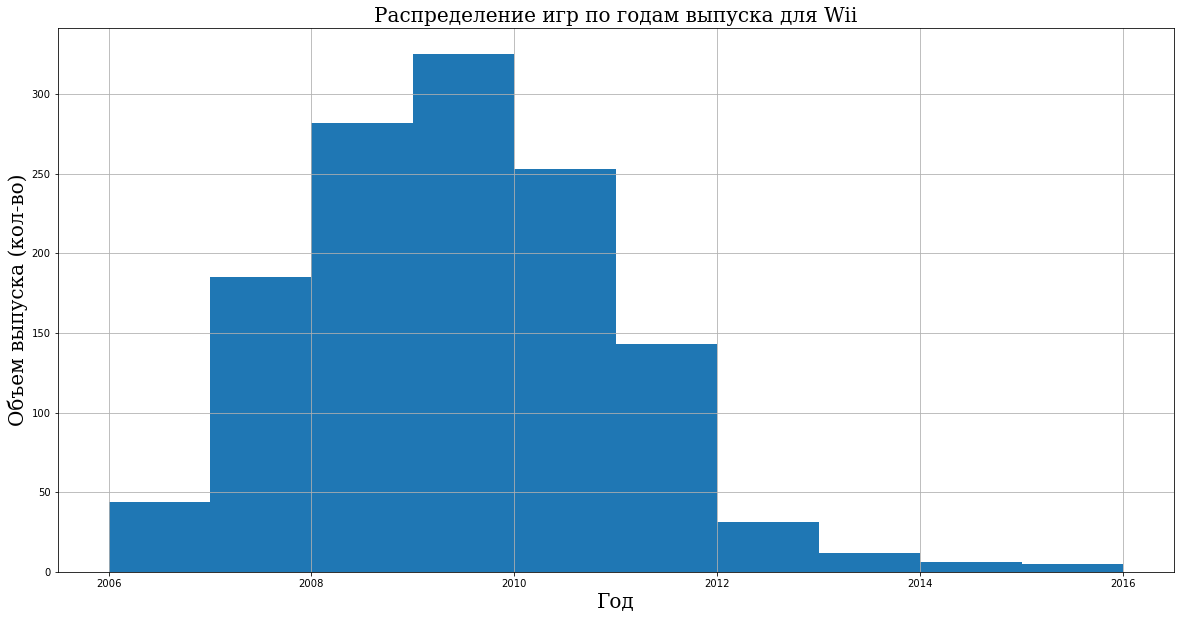

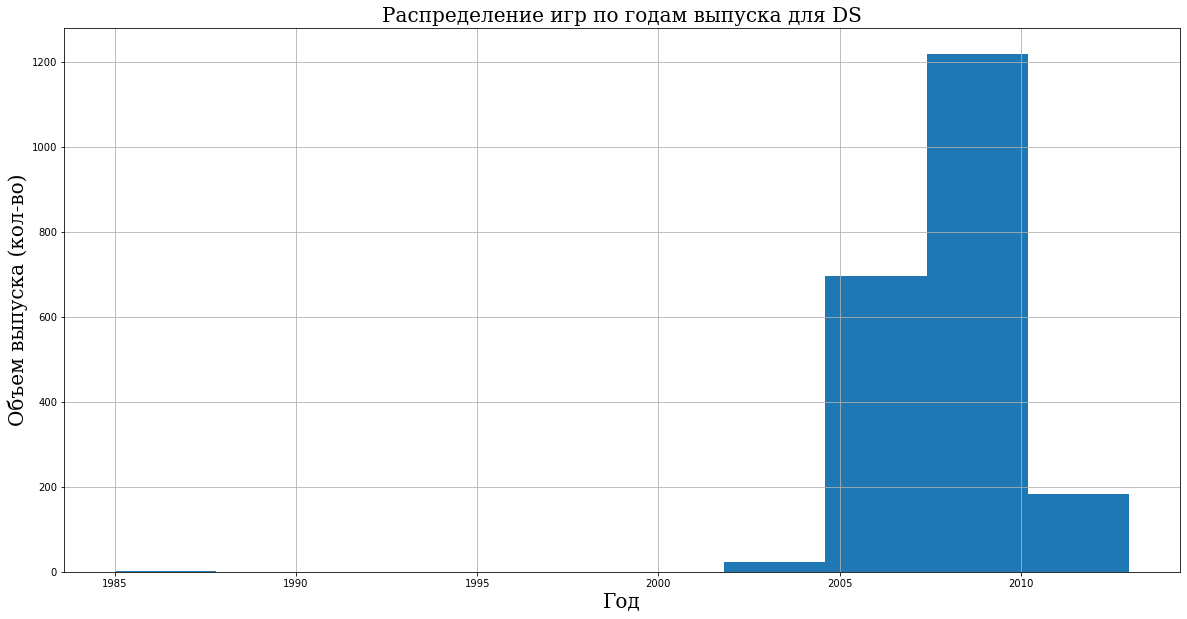

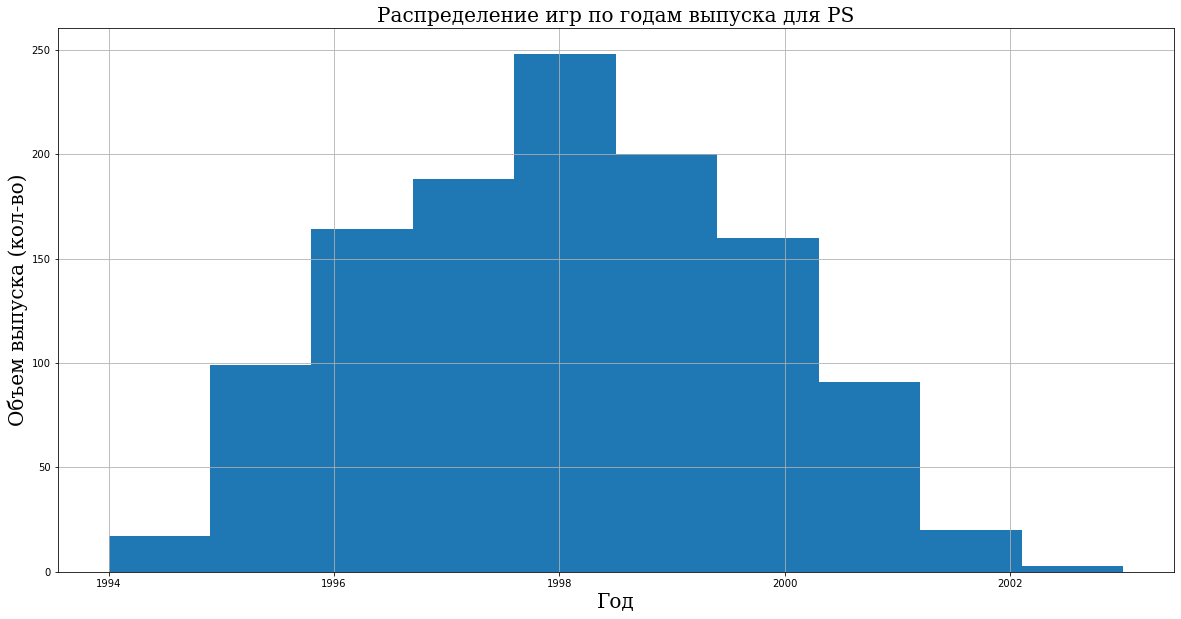

In [26]:
for platform in ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']:
    plt.figure(figsize=[20, 10])
    plt.hist(data.query('platform == @platform')['year_of_release'])
    plt.title(f'Распределение игр по годам выпуска для {platform}', fontdict=font)
    plt.xlabel('Год', fontdict=font)
    plt.ylabel('Объем выпуска (кол-во)', fontdict=font)
    plt.grid(True)
    plt.show()

Как можно заметить по полученным графикам, количество игр, выпускаемых для каждой платформы, подчиняется общему принципу. Вначале наблюдается существенный рост объемов выпускаемых игр, однако после достижения пика данный показатель стремительно сокращается. Примечательно, что зачастую спад в выпуске приходится как раз перед или в сам год объявления платформы нового поколения в рамках одной серии - как, например, спад в играх на PS3 с 2012 года и официальный анонс PS4 в начале 2013 года.

Также поговорим немного о цикличности в данных. Как можно заметить, примерный срок популярности платформы составляет 4-6 лет - как раз через столько выходит платформа нового поколения и популярность старых начинает снижаться.

Итак, как мы уже отмечали ранее, учитывать полный набор данных не оптимально - игровая индустрия слишком бысто меняется, и то, что было актуально раньше, вскоре может перестать быть таковым. Чтобы избежать получения неактуальных результатов, нам стоит ограничить нашу выборку. По анализу выпускаемых по годам игр мы определили, что в конечную выборку стоит включить данные начиная с 2000 года. После мы провели анализ платформ на цикличность и выявили, что средний срок популярности платформы составляет 6 лет. Теперь, благодаря полученной информации нами было принято решение включить в выборку только те видеоигры, которые были выпущены начиная с 2010 года. 

Почему именно этот год? Исходная выборка заканчивается на 2016 году, а прогноз компания-заказчик будет стоить для 2017 года. Следовательно, для получения хорошего прогноза стоит использовать более релевантный период. Поскольку игровая индустрия является одной из наиболее быстро развивающихся и изменяющихся, остановимся на интервале в три года до момента прогнозирования, то есть с 2014 года. Таким образом мы не станем учитывать близкие к "смерти" платформы, а также не упустим те, которые только начинают набирать популярность.

Итак, создадим новый датафрейм, который будет включать только те видеоигры, которые выходили с 2014 года.

In [27]:
data_act = data.query('year_of_release >= 2014')

### Анализ платформ

Перейдем к следующему блоку анализа - анализу продаж по платформам. Для начала посмотрим, как изменялся объем продаж для каждой из платформ в рассматриваемый период. Для наглядности отобразим изменения в продажах на общем графике, где можно будет одновременно наблюдать данные по всем платформам, попавшим в итоговый набор данных. 

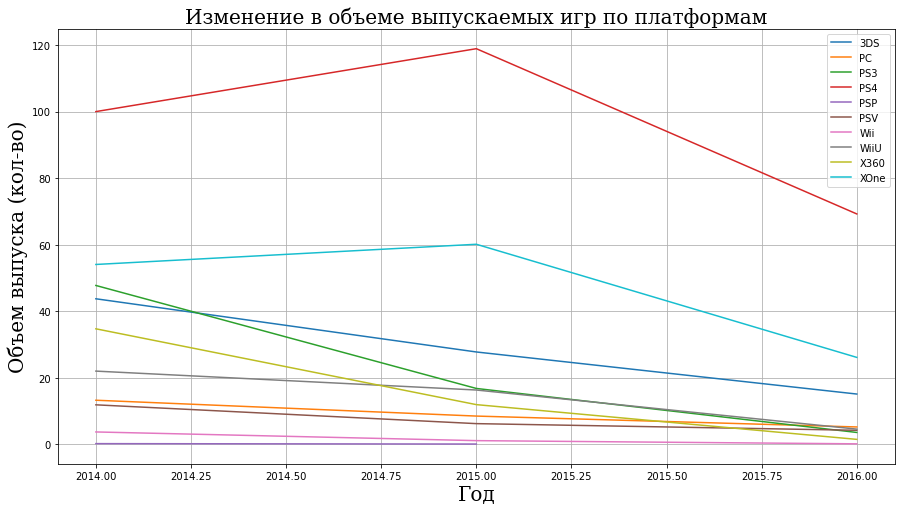

In [28]:
platform_plot = data_act.pivot_table(index=['year_of_release'], columns = 'platform', values='sum_sales', aggfunc = 'sum')

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(platform_plot)
ax.set_title('Изменение в объеме выпускаемых игр по платформам', fontdict=font)
plt.xlabel('Год', fontdict=font)
plt.ylabel('Объем выпуска (кол-во)', fontdict=font)
ax.grid(True)
ax.legend(loc='best', labels = list(platform_plot.columns))
plt.show()

Лидерами продаж являются две платформы - PlayStation 4 и Xbox One. Обе консоли являются последними вышедшими в рамках своих серий, так что их популярность довольно логична. Остальные же платформы демонстрируют преимущественно падение в объемах продаж. Данный результат также весьма ожидаем - остальные консоли были выпущены куда раньше тех двух, что лидируют по продажам, а значит количество игр, подходящих для данных платформ, также снижается, что негативно сказывается на объемах продаж. Кроме того, среди "угасающих" платформ довольно много представителей одой серии (таких, как серии PlayStation или Wii), так что не удивительно, что их популярность снижается на фоне выхода платформ нового поколения. 

Отдельно хотелось бы обратить внимание на группу компактных консолей - серии Wii и Nintendo. Обе серии изначально имеют куда меньшую популярность по сравнению с теми же гигантами индустрии, как PlayStation, да и именных игр с заведомо высокой популярностью для данных платформ выходит куда меньше. Между тем, такие консоли нельзя полностью исключать из анализа, ведь, как и любая платформа, они имеют свою значимую базу пользователей.

Итак, какие же платформы можно назвать наиболее популярными? К такому типу можно отнести три платформы. Среди гигантов, несомненно, выделяются PlayStation 4 и Xbox One, которые были реализованы совсем недавно, и их цикл еще не достиг точки снижения популярности. Отдельно отметим, что снижение в объемах продаж в 2016 году наблюдается для всех платформ, а значит мы можем не зацикливаться на данном факте слишком сильно. Возможно, сбор данных происходил не в конце 2016 года и часть вышедших после сбора игр просто не была учтена. Среди компактных платформ хотелось бы выделить 3DS, но с весьма критическим замечанием - данная платформа имеет существенную популярность только для пользователей из Японии, а в других регионах ее популярность существенно ниже (в данном выводе мы убедимся позже на этапе анализа пользователей). Однако, чтобы не упустить часть рынка, связанного с компактными консолями, стоит учесть и ее. 

Перейдем к следующей стадии анализа платформ - построению диаграммы ящик с усами.

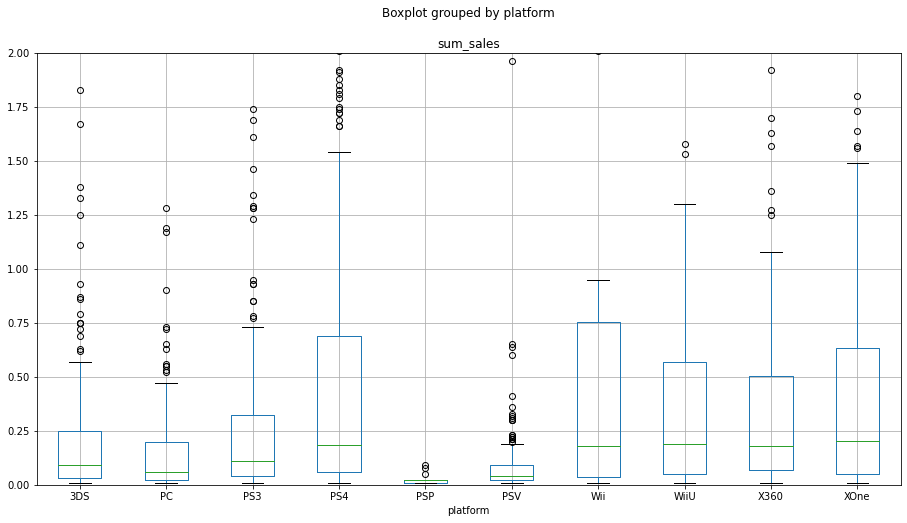

In [29]:
data_act.boxplot(column='sum_sales', by='platform', figsize=(15,8)) 
plt.ylim(0, 2)
plt.show()

В целом, сделанные нами ранее выводы также подтверждаются и на диаграмме ящик с усами. Медианные продажи у крупных и популярных платформ нескольких последних поколений наиболее высоки. У менее поздних и именных платформ размах диапазона, в рамках которого лежит большинство наблюдений, значительно меньше. Из примечательного хотелось бы отметить тот факт, что у двух из трех выбранных нами серий (самых крупных), диапазон для большинства значений консоли нового поколения превышает аналогичный показатель его предшественника. Провести подобный анализ для Nintendo не представляется возможным, поскольку консоль предыдущего поколения данной серии не вошла в актуальный набор данных. 

Кратко подытожим полученные по платформам выводы. Наиболее потенциально прибыльные платформы - PlayStation 4 и Xbox One. Именно по данным платформам наблюдаются наибольшие продажи в последние несколько лет. PS4 существенно превосходит своего предшественника по квартальным продажам.

Из компактных приставок выделяется Nintendo 3DS, но стоит учитывать, что данная консоль относится к группе портативных, а значит рынок видеоигр для данной группы заведомо меньше по сравнению с классическими приставками.

### Анализ оценок

Теперь перейдем к анализу влияния **отзывов пользователей и критиков** на продажи. Для удобства рассмотрим данное влияние на примере одной наиболее популярной платформы. По результатам предыдущего анализа, наиболее популярной платформой можно назвать PlayStation 4 - именно на ее примере мы и рассмотрим влияние, оказываемое отзывами на продажи игр. 

Начнем с построения диаграммы рассеяния и расчета корреляции - наиболее простого способа для выявления потенциальной зависимости.

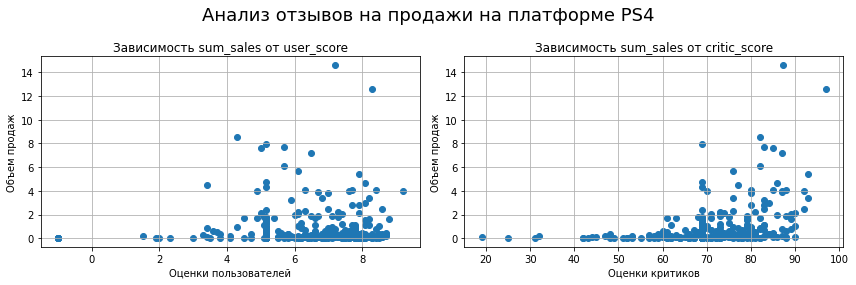

Коэффициент корреляции Пирсона между sum_sales и user_score составляет 0.09164764519222252
Коэффициент корреляции Пирсона между sum_sales и critic_score составляет 0.38476645385924224


In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
fig.suptitle('Анализ отзывов на продажи на платформе PS4', fontsize=18)
ax1.scatter(data_act.query('platform == "PS4"')['user_score'], data_act.query('platform == "PS4"')['sum_sales'])
ax1.set_title('Зависимость sum_sales от user_score')
ax1.set_xlabel('Оценки пользователей')
ax1.set_ylabel('Объем продаж')
ax1.grid(True)
ax2.scatter(data_act.query('platform == "PS4"')['critic_score'], data_act.query('platform == "PS4"')['sum_sales'])
ax2.set_title('Зависимость sum_sales от critic_score')
ax2.set_xlabel('Оценки критиков')
ax2.set_ylabel('Объем продаж')
ax2.grid(True)
plt.tight_layout()
plt.show()

for name in ['user_score', 'critic_score']:
    print(f'Коэффициент корреляции Пирсона между sum_sales и {name} составляет', data_act.query('platform == "PS4"')['sum_sales'].corr(data_act.query('platform == "PS4"')[name]))

Итак, что мы можем сказать по полученным результатам? Начнем с анализа влияния **оценок пользователей**. По графику мы можем сказать о наличии некоторой положительной линейной связи между **оценками** и **объемами продаж**. Это довольно логично - чем больше положительных отзывов об игре, тем привлекательнее она становится в глазах потенциальных покупателей. Между тем, скорее всего, связь между данными характеристиками несильная, что подтверждается расчетом коэффициента корреляции. Можно попробовать объяснить подобный результат следующим образом. Первые оценки для большинства игр появляются именно от критиков, особенно от тех, кому была выдана игра до официального релиза. И поэтому первые покупки игры, которые в долевом отношении от итоговых покупок составляют основную массу, осуществляются под влиянием именно оценок критиков. А вот на более поздние продажи игр как раз оказывают влияние оценки пользователей. Ведь, видя как другие такие же пользователи хорошо оценили игру, те, кто до этого сомневался в покупке, могут таки решить приобрести игру. И, поскольку доля поздних продаж куда меньше, то и оцениваемое влияние выходит также меньшим. 

В подтверждение предыдущих выводов говорят полученные результаты относительно связи между **оценками критиков** и **суммарными продажами**. Что визуально, что в расчетном выражении, между данными пресутсвуют более сильная линейная взаимосвязь. Принцип влияния весьма похожий - чем выше оценки критиков, тем выше продажи. Это также довольно логично, ведь чем выше оценили игру те, чье мнение для обычных пользователей выступает в качестве ориентира, тем больше людей захотят сыграть в данную игру, а значит и продажи будут выше. 

Между тем, важно понимать, что, как и в любой отрасли, результатом работы которой является некоторый продукт, встречаются самые разные исключения. Так, игра может получить крайне высокие оценки у критиков, и крайне низкие от самих пользователей. А может произойти абсолютно обратная ситуация - игра, что была разгромлена критиками, получила крайне высокие пользовательские оценки. И, конечно, оба случая по-разному скажутся на общих продажах. Если для первого случая можно ожидать довольно высокие продажи - за счет предпродаж, совершенных под влиянием оценки критиков, то для второго случая продажи могут быть заниженными.

Насколько же релевантны для других платформ выводы, полученные по PlayStation 4? Для ответа на этот вопрос рассмотрим еще две популярные платформы. Это поможет вычислить общую тенденцию для влияния оценок критиков и пользователей.

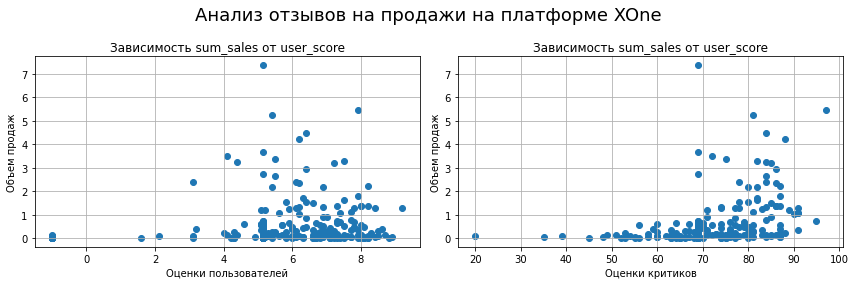

Коэффициент корреляции Пирсона между sum_sales и user_score составляет 0.08760561246308564
Коэффициент корреляции Пирсона между sum_sales и critic_score составляет 0.3846950521479985


In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
fig.suptitle('Анализ отзывов на продажи на платформе XOne', fontsize=18)
ax1.scatter(data_act.query('platform == "XOne"')['user_score'], data_act.query('platform == "XOne"')['sum_sales'])
ax1.set_title('Зависимость sum_sales от user_score')
ax1.set_xlabel('Оценки пользователей')
ax1.set_ylabel('Объем продаж')
ax1.grid(True)
ax2.scatter(data_act.query('platform == "XOne"')['critic_score'], data_act.query('platform == "XOne"')['sum_sales'])
ax2.set_title('Зависимость sum_sales от user_score')
ax2.set_xlabel('Оценки критиков')
ax2.set_ylabel('Объем продаж')
ax2.grid(True)
plt.tight_layout()
plt.show()

for name in ['user_score', 'critic_score']:
    print(f'Коэффициент корреляции Пирсона между sum_sales и {name} составляет', data_act.query('platform == "XOne"')['sum_sales'].corr(data_act.query('platform == "XOne"')[name]))

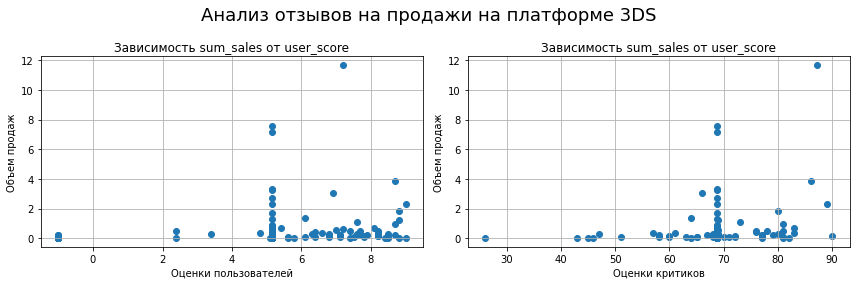

Коэффициент корреляции Пирсона между sum_sales и user_score составляет 0.15409114032918908
Коэффициент корреляции Пирсона между sum_sales и critic_score составляет 0.22736358368271975


In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
fig.suptitle('Анализ отзывов на продажи на платформе 3DS', fontsize=18)
ax1.scatter(data_act.query('platform == "3DS"')['user_score'], data_act.query('platform == "3DS"')['sum_sales'])
ax1.set_title('Зависимость sum_sales от user_score')
ax1.set_xlabel('Оценки пользователей')
ax1.set_ylabel('Объем продаж')
ax1.grid(True)
ax2.scatter(data_act.query('platform == "3DS"')['critic_score'], data_act.query('platform == "3DS"')['sum_sales'])
ax2.set_title('Зависимость sum_sales от user_score')
ax2.set_xlabel('Оценки критиков')
ax2.set_ylabel('Объем продаж')
ax2.grid(True)
plt.tight_layout()
plt.show()

for name in ['user_score', 'critic_score']:
    print(f'Коэффициент корреляции Пирсона между sum_sales и {name} составляет', 
          data_act.query('platform == "3DS"')['sum_sales'].corr(data_act.query('platform == "3DS"')[name]))

Результаты, полученные для Xbox One, в целом соответствуют сделанными нами ранее выводам. А вот для платформы Wii U все немного по другому. Влияние, оказываемое как **оценками критиков**, так и **оценками пользователей** становится более одинаковым. Возможно, подобная более сильное влияние у пользователей наблюдается именно у портативных консолей, или, влияние оказывает тот факт, что данная консоль существует дольше PS4 и XOn.

### Анализ жанров

Наконец, перейдем к завершающему этапу исследовательского анализа, а именно к анализу жанров. Для начала посмотрим на общее распределение выпускаемых игр по жанрам в течении рассматриваемого нами периода.

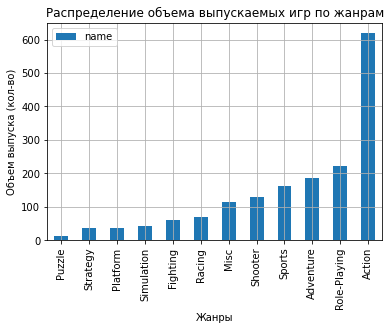

In [33]:
data_act.pivot_table(index='genre', values='name', aggfunc='count').sort_values('name').plot(kind='bar')
plt.title('Распределение объема выпускаемых игр по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Объем выпуска (кол-во)')
plt.grid(True)
plt.show()

Наибольшее число игр выпускается в жанре "Action". На русском языке такие игры называются играми жанра "Экшен" или "боевик" если приводить аналогию с киножанром. В экшен-играх пользователю предлагается взять управление над некоторым главным героем или даже группой ключевых персонажей. Основная задача для таких игр может быть совершенно разной: от нахождения выхода с уровня или победы над некоторым боссом до квинтэссенции всех возможных заданий. Действие таких игр обычно развивается очень динамично, что делает такой жанр невероятно популярным - объем игр, выпускаемых в рамках данного жанра, почти в три раза превышает объем жанра, занимающего второе место по объемам. 

Вторым по объемам является жанр "Role-Playing" или же RPG. В играх данного жанра игроки также управляют персонажами, однако теперь они более разнообразны в своих умениях, характеристиках и путях развития. Кроме того, игры такого жанра чаще всего обладают открытым интересным миром, что также весьма подкупает потенциальных пользователей. Дальше по объемам выпуска идут "Adventure" игры/ Важнейшими элементами игры в жанре квеста являются собственно повествование и исследование мира, а ключевую роль в игровом процессе играет решение головоломок и задач, требующих от игрока умственных усилий. Особая популярность жанра приключений обуславливает большим разнообразий сюжета и историй - от классических квестов и головоломок до текстовых новел и визуальных романов.

Наименьший объем выпуска наблюдается у следующих жанров - стратегии, пазлы и платформеры. В целом, это также ожидаемый результат. Так, жанры "стратегия" и "платформер" зачастую являются дополнительным жанром у игр, чей основной жанр относится к куда более популярной категории - "Аction" или "Adventure". Ведь, зачастую, игра обладает не одним жанром, а несколькими. А вот "пазлы" как жанр действительно весьма непопулярны, особенно если мы говорим об играх на платформы - такой тип больше подходит для мобильных игр.

Также посмотрим на жанры в зависимости от объемов продаж.

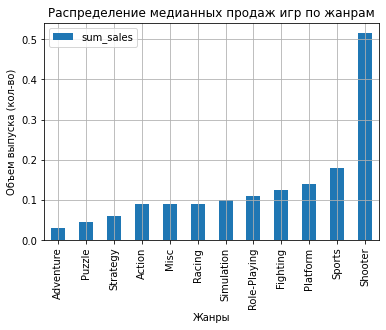

In [34]:
data_act.pivot_table(index='genre', values='sum_sales', aggfunc='median').sort_values('sum_sales').plot(kind='bar', grid=True, title = 'Зависимость sum_sales от genre')
plt.title('Распределение медианных продаж игр по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Объем выпуска (кол-во)')
plt.show()

Лидирующую позицию занимает жанр "Shooter". "Шутер" или как по простому можно назвать данный тип игр "стрелялка" имеет следующий геймплей - игроку нужно достичь выхода с уровня, с устранением всех противников и препятствий. Благодаря наличию большого количества разнообразных уровней и игровых заданий, наличие множества приспособлений и оружий для выполнения заданий, а также возможности играть с другими пользователями, данный жанр также является весьма популярным среди пользователей и с уверенностью занимает второе место в рейтинге по продажам.

Вторым по медианному объему продаж оказался жанр "Sports", что также не удивительно - за многие года существования жанра у него сформировалась весьма крупная база фанатов. Отдельное влияние также накладывает немалое число игр, выпускаемых в данном жанре - четвертое место по объему продаж.

Наконец, на третьем месте располагаются игры жанра "Platform". В данном жанре основу игрового процесса составляют прыжки по платформам, лазанье по лестницам, сбор предметов, необходимых для победы над врагами или завершения уровня. Это довольно давний и устоявшийся жанр игр с немалым числом популярных игровых серий - таких как Mario и Sonic. Неудивительно, что это все привело к неплохой популярность данного жанра.

Наименее популярными по проданным копиям являются игры жанра "Puzzle", "Strategy" и "Adventure". Про пазлы мы уже говорили ранее - данный жанр больше подходит под классические мобильные игры и не является популярным на платформах. Жанры "стратегия" и "адвенчер" также являются более популярными в качестве поджанра у игр, а не в виде самостоятельного жанра.

Подытожим полученные на данном этапе анализа выводы. Прежде всего, игровая индустрия сильно менялась с момента зарождения - сначала и игр, и платформ становилось больше, однако со временем на плаву остались только крупные и "мощные" консоли, а число выпускаемых игр было снижено ради достижения лучшего качества. Также, мы выявили, что средняя продолжительность фазы популярности у консоли составляет 4-6 лет, после чего количество выпускаемых для этих консолей игр идет на спад. Это не удивительно - за такой период обычно создается консоль следующего поколения в рамках серии.

Наиболее популярными платформами в последние несколько лет считаются PS4 и XOne - именно они также являются последними вышедшими платформами. На третьем месте располагается Nintendo 3DS, являющаяся наиболее популярным представителем компактных платформ.

Если говорить о влиянии отзывов на объем продаж, то оценки обеих групп положительны, однако сила влияния  критиков выше по сравнению с пользователями. По крайней мере для таких крупных платформ PS4 и XOne.

Наконец, также упомянем результаты анализа жанров. Наибольшее число выпускаемых игр имеет жанр экшен, а по медианным продажам лидирующее место занимают игры жанра шутер.

## Составление портрета пользователя каждого региона

Мы приступаем к следующему этапу исследования, а именно к составлению классического портрета для пользователей каждого из рассматриваемых регионов - Северная Америка, Европа и Япония.

Начнем наш анализ с выявления наиболее популярных жанров для каждого из регионов. 

In [35]:
gen_NA = data_act.pivot_table(index='genre', values=['NA_sales'], aggfunc='sum').sort_values('NA_sales')
gen_EU = data_act.pivot_table(index='genre', values=['EU_sales'], aggfunc='sum').sort_values('EU_sales')
gen_JP = data_act.pivot_table(index='genre', values=['JP_sales'], aggfunc='sum').sort_values('JP_sales')

display_side_by_side(gen_NA, gen_EU, gen_JP)

,NA_sales
genre,
Puzzle,0.65
Strategy,0.98
Simulation,2.63
Adventure,5.64
Platform,6.79
Racing,8.74
Fighting,12.43
Misc,15.05
Role-Playing,33.47


Итак, что мы можем сказать по полученным результатам. В целом, наиболее популярным для пользователей из Америки и Европы является примерно одинаковый набор игр, хотя их положение в топе может немного разниться. На первых двух местах располагаются игры жанров шутер и экшен, на третьем спортивные игры, четвертое место - РПГ. О причинах популярности каждого из перечисленных жанров мы уже рассуждали ранее, так что вновь опустим данный момент. Более существенные различия наблюдаются на пятом месте: объединенный жанр "Misc" для Америки и гонки для Европы. Вероятно, схожесть в жанрах можно объяснить общей схожестью во вкусах, объясняемой также культурной похожестью.

В то же время, для пользователей из Японии список топовых жанров несколько разнится. На первом месте у них располагаются ролевые игры, а вот экшен игры находятся на втором месте. На третьем месте у них располагаются игры жанра "Fight" или файтинг - именно японским компаниям принадлежат две из трех наиболее популярных серий файтингов. После следует объединенный жанр и закрывают топ шутеры. С чем может быть связано такое сильное различие в предпочитаемых жанрах? Прежде всего поговорим немного о наиболее популярных японских компаниях, выпускающих видеоигры. Большинство их игр имеет двойной жанр в качестве основного - "Action/RPG", а значит популярность каждого из жанра зависит исключительно от того, к какому жанру ее отнесли те люди, которые вносили игру в общие реестры. Перейдем к следующим трем жанрам. Их популярность также весьма объяснима - это либо популярные жанры у компактных платформ (чья популярность выше именно у пользователей из японии, как мы убедимся далее), либо выпускаются именно японскими компаниями.

Теперь проведем аналогичный анализ по платформам.

In [36]:
plat_NA = data_act.pivot_table(index='platform', values=['NA_sales'], aggfunc='sum').sort_values('NA_sales')
plat_EU = data_act.pivot_table(index='platform', values=['EU_sales'], aggfunc='sum').sort_values('EU_sales')
plat_JP = data_act.pivot_table(index='platform', values=['JP_sales'], aggfunc='sum').sort_values('JP_sales')
display_side_by_side(plat_NA, plat_EU, plat_JP)

,NA_sales
platform,
PSP,0.00
Wii,2.08
PSV,2.52
PC,7.23
WiiU,19.36
PS3,22.05
3DS,22.64
X360,28.30
XOne,81.27


Тут уже наблюдается сильная волатильность для каждого из регионов. Прежде всего, отметим тот факт, что пользователи из Японии отдают предпочтения платформам, созданным компаниями из их страны - PlayStation и Nintendo обе являются японскими компаниями и именно их платформы занимают топовые места среди предпочтений японских игроков. Также примечательно то, что их более интересуют компактные платформы нежели классические - три из пяти мест в топе.

Относительно последнего поколения платформ пользователи из Америки и Европы солидарны во мнении - на первом месте располагается PS4, которую многие посчитали более успешной по сравнению с приставкой основного конкурента - XOne, которая занимает второе место. На третьем месте располагаются разные консоли. Пользователи из Америки отдают предпочтение "своей" приставке - Xbox это игровая приставка, разработанная и выпущенная американской компанией Microsoft, в то время как Европейские пользователи более заинтересованы в японском PS от Sony. Четвертое место у обеих групп также разнится. Американские пользователи отдают предпочтение компактной консоли 3DS, в то время как пользователи из Европы более заинтересованы в ПК.

Наконец рассмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе. Для удобства анализа дополнительно выведем словарь с категориями. 

In [37]:
rating_dict.sort_values('rating_cat')

,rating,rating_cat
8,RP,0.0
7,EC,1.0
0,E,2.0
5,K-A,2.0
4,E10+,3.0
3,T,4.0
2,M,5.0
6,AO,6.0
1,NaN,NaN


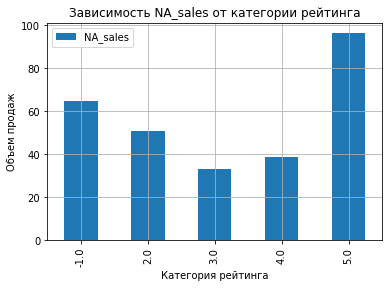

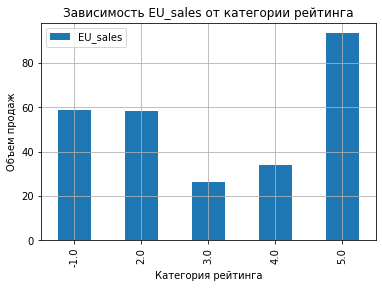

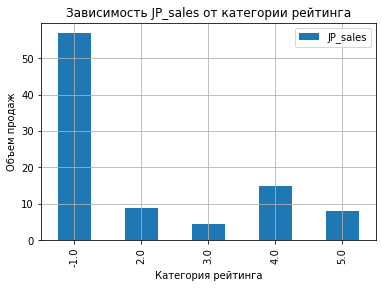

In [38]:
for region in ['NA_sales', 'EU_sales', 'JP_sales']:
    data_act.pivot_table(index='rating_cat', values=region, aggfunc='sum').plot(kind='bar',
                                                                                grid=True, title = f'Зависимость {region} от rating_cat')
    plt.title(f'Зависимость {region} от категории рейтинга')
    plt.xlabel('Категория рейтинга')
    plt.ylabel('Объем продаж')
    plt.show()

Что ж, влияние рейтинга на продажи в Америке и Европе примерно одинаковые. Наиболее популярной категории являются игры для взрослых. В таких играх довольно много жестокого или сексуального контента и они совершенно не подходят для детей. На втором месте располагаются игры с рейтингом "для всех". Основная аудитория таких игр - дети от 6 лет, но такие игры также могут быть интересны и взрослым. В них весьма ограничен жестокий контент, но их содержание весьма интересно, что позволяет им подходить игрокам почти всех возрастных групп. Дальше идет группа игр с жанром для подростков - игроков от 13 лет. Примечательно, что разница в продажах в Европе для данного рейтинга более существенная по сравнению с продажами в Америке. Наконец, меньше всего отдают предпочтение играм для детей от 10 и старше. Есть предположение, что из-за специфики деления игр данного рейтинга в целом выпускается меньше, поэтому их продажи также невелики. Общую похожесть в рейтинге жанров можно объяснить действующими в Америке и Европе рейтинговыми системами - они имеют крайне похожие способы оценивания игр. 

Для пользователей из Японии результат разбиения по рейтингу весьма разнится. Первое место по продажам занимают игры с рейтингом для подростков и старше. На втором месте у них располагаются игры с рейтингом для всех, и только на третьем месте находятся игры для взрослых. И, наконец, на последнем месте для японских пользователей также располагаются игры для детей от 10 и старше. Что примечательно, число продаж игр без рейтинга в Японии существенно превышает аналогичную группу в Америке и Европе. Вероятно, основная причина кроется в самих рейтингах. В Японии используется рейтинг CERO. Полностью совпадающих категорий в обоих рейтингах всего три - игры для всех, для подростков и взрослые. Именно эти категории и представлены у нас. В таком случае, игры, которые не имеют рейтинг по нашим данным, вероятно, либо относятся к уникальной категории в рамках Японского рейтинга, либо не подходят под американское разбиение по рейтингу.

Подытожим полученные результаты. Наиболее популярными жанрами для пользователей любых регионов являются игры жанров "Action/RPG" и "Shooter". Они привлекают игроков своим разнообразием и красочностью. Относительно предпочтений в платформах игроки также менее едины -  наиболее популярной платформой у жителей Америки и Европы является PlayStation 4, в то время как японские игроки отдают свое предпочтение компактным приставкам. Наконец, наибольшее число продаж в Европе и Америке имеют игры со взрослым рейтингом, а в Японии наиболее популярными являются игры для всех возрастов. 

## Проверка гипотез

Наконец, перейдем к заключающему этапу нашего исследования - проверки гипотез. Всего мы проверим две основные гипотезы о платформах и жанрах. Рассмотрим каждую из гипотез в отдельности.

Начнем со сравнения средних оценок пользователей платформ Xbox One и PС. Для начала сформулируем основные гипотезы, которые нам будет обходимо проверить.

Нулевая гипотеза имеет следующий вид: средние пользовательские рейтинги платформ Xbox One и PC значимо не различается. Т.е. Н0: Е(оценки пользователей XOne) = Е(оценки пользователей PC).

Альтернативная гипотеза, соответственно, будет иметь следующий вид: средние пользовательские рейтинги платформ Xbox One и PC значимо различается. Т.е. Н1: Е(оценки пользователей XOne) ≠ Е(оценки пользователей PC). Мы будем рассматривать именно двухстороннюю альтернативную гипотезу, поскольку для нас не важно, среднее значение какого именно тарифа превышает аналогичный показатель для альтернативного тарифа.

Рассмотрим два уровня значимости: 5% и 1%. Для начала сравним полученное значение p-value с 1%. Если нулевая гипотеза не будет отвергаться на столь маленьком уровне, то допустимо не совершать дополнительные проверки - полученный результат будет достаточно релевантен для любого уровня значимости. Если же, напротив, для 1% значимости нулевая гипотеза будет отвергнута, имеет смысл рассмотреть немного больший уровень значимости - ведь, все-таки 1% уровень является крайней мерой при проверке гипотез.

In [39]:
alpha = .01

results = st.ttest_ind(data_act.query('platform == "XOne"')['user_score'], 
    data_act.query('platform == "PC"')['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.9097705444218422
Не получилось отвергнуть нулевую гипотезу


In [40]:
alpha = .05

results = st.ttest_ind(data_act.query('platform == "XOne"')['user_score'], 
    data_act.query('platform == "PC"')['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.9097705444218422
Не получилось отвергнуть нулевую гипотезу


Согласно полученным результатам мы не имеем достаточного основания отвергнуть основную гипотезу на любом разумном уровне значимости. Полученный результат весьма логичен. Прежде всего, оценка игре ставится за, так сказать, "внутренность" этой самой игры, а не за платформу, для которой она выпускалась. 

Теперь перейдем к анализу средней пользовательской оценки по жанрам, а именно сравним, различается ли средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»).

Как и прежде, начнем с разработки подходящих формулировок для основных гипотезы, которые нам будет обходимо проверить.

Нулевая гипотеза имеет следующий вид: средний пользовательские рейтинги жанров Action и Sports значимо не различается. Т.е. Н0: Е(оценка пользователей жанра Action) = Е(оценка пользователей жанра Sports).

Альтернативная гипотеза, соответственно, будет иметь следующий вид: средний пользовательские рейтинги жанров Action и Sports значимо различается. Т.е. Н1: Е(оценка пользователей жанра Action) ≠ Е(оценка пользователей жанра Sports). В данном пункте мы также будет рассматривать именно двухстороннюю альтернативную гипотезу, поскольку для нас не важно, среднее значение какого именно региона превышает аналогичный показатель для альтернативной группы.

Рассмотрим два уровня значимости: 5% и 1%. Для начала сравним полученное значение p-value с 1%. Если нулевая гипотеза не будет отвергаться на столь маленьком уровне, то допустимо не совершать дополнительные проверки - полученный результат будет достаточно релевантен для любого уровня значимости. Если же, напротив, для 1% значимости нулевая гипотеза будет отвергнута, имеет смысл рассмотреть немного больший уровень значимости - ведь, все-таки 1% уровень является крайней мерой при проверке гипотез.

In [41]:
alpha = .01

results = st.ttest_ind(data_act.query('genre == "Action"')['user_score'], 
    data_act.query('genre == "Sports"')['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0002449154876490993
Отвергаем нулевую гипотезу


In [42]:
alpha = .05

results = st.ttest_ind(data_act.query('genre == "Action"')['user_score'], 
    data_act.query('genre == "Sports"')['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0002449154876490993
Отвергаем нулевую гипотезу


На любом разумном уровне значимости наша основная гипотеза отвергается. Это также было весьма ожидаемо - среди игр жанра экшен куда больше интересных и громкоименных игр, чьи рейтинги значительно превышают рейтинги довольно однотипных игр в жанре спорт.

## Итоговые выводы

Итак, нами был проведен предварительный анализ выпускаемых видеоигр с целью выявления закономерностей, которые наиболее сильно влияют на успешность игры. Эту информацию поможет компании-заказчику сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Какие закономерности нам удалось выявить?
1. В последние несколько лет стремительно набирают популярность недавно вышедшие платформы PS4 и XOne. В ближайшее время игры будут выходить преимущественно на данные платформы. Среди компактных платформ выделяется Nintendo 3DS.
2. Оценки как критиков, так и пользователей имеют положительное влияние на объемы продаж, однако сила влияния первой группы сильнее.
3. Наиболее популярный и прибыльный жанр - шутер. Именно на него стоит сделать ставку. Также можно обратить внимание на ролевые игры, ведь нередко они выпускаются под двойным жанром Action/RPG.
4. В последние несколько лет наибольшей популярностью у пользователей из Америки и Европы пользуется последняя вышедшая консоль серии PlayStation. Японские пользователи также предпочитают данную серию консолей, но наибольшей популярностью у них пользуются именно компактные переносные консоли из серии Nintendo.
5. Американцы и европейцы отдают предпочтение взрослым играм, а на втором месту у них игры для всех возрастов. У японских пользователей, напротив, на первом месте располагаются игры для подростков, а на втором - игры для всех возрастов. Однако результаты для японских пользователей могут быть менее точными в силу существенного числа игр без рейтинга. 
6. Средние оценки на платформах серии Xbox и ПК значимо не разнятся. Для играков куда важнее содержание игры, чем предназначенная для нее платформа.
7. А вот средние оценки игр жанров экшен и спорт существенно разнятся. 